# Running Calibration Analysis

In [1]:
day = '9'
month = 'September'
year = '2018'

In [2]:
import ExpFile as exp
import AnalysisHelpers as ah

In [3]:
from matplotlib.pyplot import *
%matplotlib inline
style.use('dark_background')

In [6]:
from ExpFile import setPath
import ExpFile as exp
import PlotlyPlotters as pp
import MatplotlibPlotters as mp
import MainAnalysis as ma
import AnalysisHelpers as ah
import Miscellaneous as misc
import MarksConstants as mc

from importlib import reload
def reloadMyModules():
    reload(exp)
    setPath(day,month,year)
    reload(misc)
    reload(ma)
    reload(ah)
    reload(pp)
    reload(mp)

reloadMyModules()

In [7]:
year = '2018'
import numpy as np
from importlib import reload
import datetime

## MOT Fill

In [26]:
reloadMyModules()

In [44]:
date_pbs_added = datetime.datetime.strptime('2019:April:18', '%Y:%B:%d')

In [45]:
motNums, times, loadTimes = [[], [], []]
for year in ['2018', '2019']:
    for month in ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']:
        print(month[:3], year, end='')
        for d in range(1,31):
            day = str(d)
            exp.setPath(day,month,year)
            reloadMyModules()
            reloadMyModules()
            try:
                try:
                    date = datetime.datetime.strptime(year+':'+month+':'+day, '%Y:%B:%d')
                except ValueError: 
                    pass
                res = ah.motFillAnalysis( 'MOT_NUMBER', loadType='basler', motKey = np.arange(0,5,0.1), exposureTime=1e-3, dataRange=(1,-1), imagingLoss= (0.8 if date < date_pbs_added else 0.4))
                rawData, intRawData, motNum, fitParams, fluoresence, motKey = res
                print('.',end='')
                times.append(date)
                motNums.append(motNum)
                loadTimes.append(fitParams[1])
            except FileNotFoundError:
                pass
            except OSError:
                pass
        print('')

Jan 2018
Feb 2018
Mar 2018
Apr 2018
May 2018
Jun 2018
Jul 2018
Aug 2018.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:787: OptimizeWarning:

Covariance of the parameters could not be estimated



...........
Sep 2018....................
Oct 2018......
Nov 2018...............
Dec 2018..................
Jan 2019..................
Feb 2019.....................
Mar 2019...................
Apr 2019........................
May 2019................
Jun 2019.................
Jul 2019..................
Aug 2019
Sep 2019
Oct 2019
Nov 2019
Dec 2019


(0, 5)

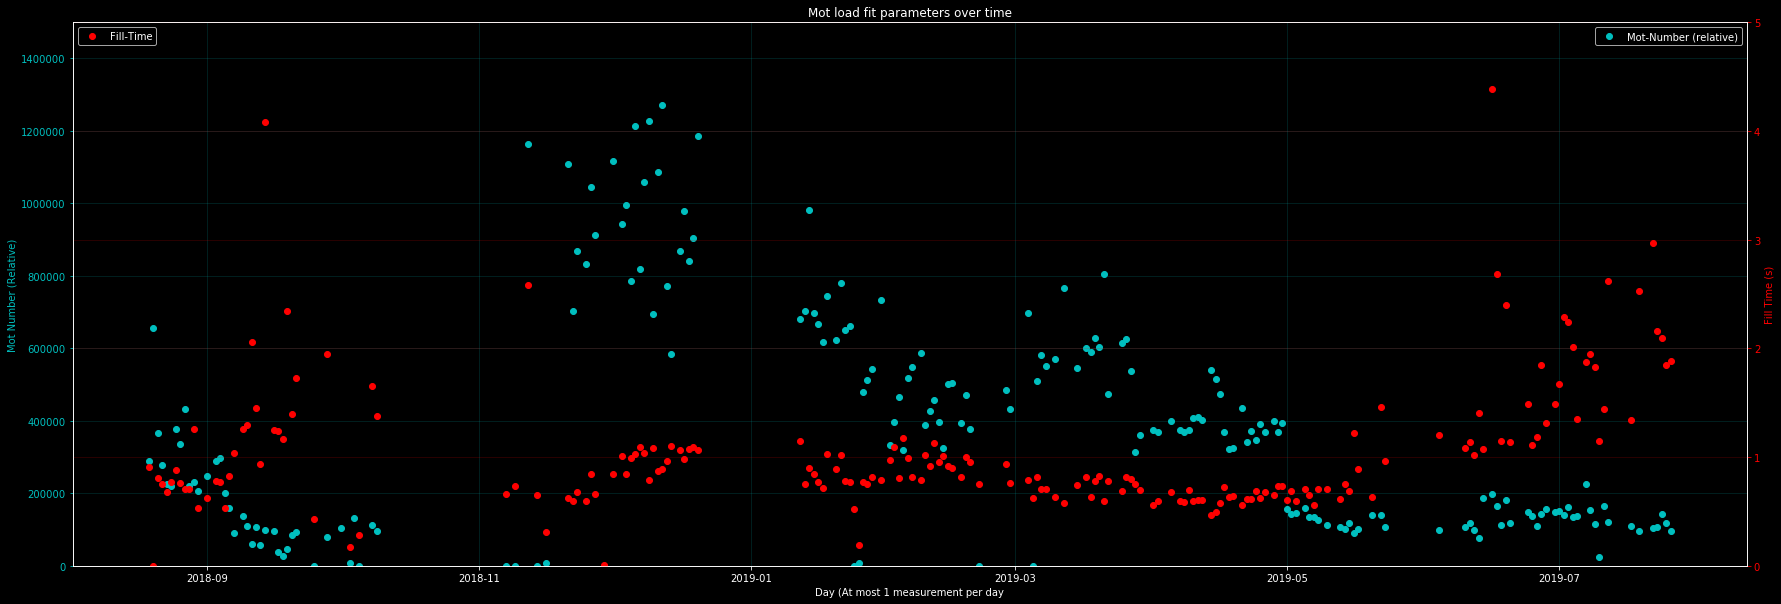

In [46]:
f, ax = subplots(1,1,figsize=(30,10))
title('Mot load fit parameters over time');
ax.plot(times, motNums,'oc', label='Mot-Number (relative)')
legend(loc='upper right')
ax.tick_params(axis='y', colors='c')
ax.set_ylabel('Mot Number (Relative)',color='c')
ax.set_xlabel('Day (At most 1 measurement per day');
ax.set_ylim(0,1.5e6);
ax.grid(True, color='c', alpha=0.2)
ax2 = ax.twinx()
ax2.plot(times, loadTimes,'or',label='Fill-Time')
legend(loc='upper left')
ax2.tick_params(axis='y', colors='r')
ax2.set_ylabel('Fill Time (s)', color='r');
ax2.grid(True,color='r', alpha=0.2)
ax2.set_ylim(0,5)


## Temperatures

### mot temperature

In [47]:
dates = []
temps = []
for month in ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']:
    for d in range(1,31):
        day = str(d)
        exp.setPath(day,month,year)
        reload(ah)
        try:
            with exp.ExpFile() as f:
                f.open_hdf5('MOT_TEMPERATURE', True)
                pics = f.get_basler_pics()
                kn, key = f.get_key()
            temp, fitVals, fitCov, times, waists, rawData, pictureFitParams = ah.temperatureAnalysis(pics, 3, key=key, accumulations=5,
                                                                                                    fitWidthGuess=20, window=[50,200,50,250])
            dates.append(datetime.datetime.strptime('2018:'+month+':'+day, '%Y:%B:%d'))
            temps.append(temp)
        except FileNotFoundError:
            pass
        except OSError:
            pass

ValueError: too many values to unpack (expected 7)

In [ ]:
plot(dates, np.array(temps)*1e6)

### red pgc temperature

In [59]:
dates = []
temps = []
for month in ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']:
    for d in range(1,31):
        day = str(d)
        exp.setPath(day,month,year)
        reload(ah)
        try:
            with exp.ExpFile() as f:
                f.open_hdf5('RED_PGC_TEMPERATURE', True)
                pics = f.get_basler_pics()
                kn, key = f.get_key()
            temp, fitVals, fitCov, times, waists, rawData, pictureFitParams = ah.temperatureAnalysis(pics, 3, key=key, accumulations=5,
                                                                                                    fitWidthGuess=20, window=[50,200,50,250])
            dates.append(datetime.datetime.strptime('2018:'+month+':'+day, '%Y:%B:%d'))
            temps.append(temp)
        except FileNotFoundError:
            pass
        except OSError:
            pass

Assuming input is a picture or array of pictures.
Data Loaded.
fitting raw data.
fitting picture Number...
0 ,1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,Assuming input is a picture or array of pictures.
Data Loaded.
fitting raw data.
fitting picture Number...
0 ,1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,Assuming input is a picture or array of pictures.
Data Loaded.
fitting raw data.
fitting picture Number...
0 ,1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,

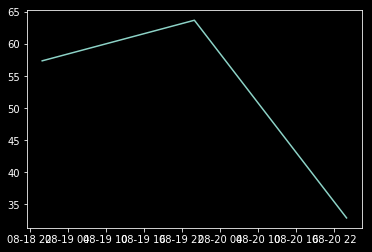

In [60]:
plot(dates, np.array(temps)*1e6)

### grey molasses Temperature

In [61]:
dates = []
temps = []
for month in ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']:
    for d in range(1,31):
        day = str(d)
        exp.setPath(day,month,year)
        reload(ah)
        try:
            with exp.ExpFile() as f:
                f.open_hdf5('GREY_MOLASSES_TEMPERATURE', True)
                pics = f.get_basler_pics()
                kn, key = f.get_key()
            temp, fitVals, fitCov, times, waists, rawData, pictureFitParams = ah.temperatureAnalysis(pics, 3, key=key, accumulations=5,
                                                                                                    fitWidthGuess=20, window=[50,200,50,250])
            dates.append(datetime.datetime.strptime('2018:'+month+':'+day, '%Y:%B:%d'))
            temps.append(temp)
        except FileNotFoundError:
            pass
        except OSError:
            pass

Assuming input is a picture or array of pictures.
Data Loaded.
fitting raw data.
fitting picture Number...
0 ,1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,

C:\Users\Regal-Lab\code\Data-Analysis-Code\fitters\LargeBeamMotExpansion.py:23: RuntimeWarning:

invalid value encountered in sqrt



Assuming input is a picture or array of pictures.
Data Loaded.
fitting raw data.
fitting picture Number...
0 ,1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,Assuming input is a picture or array of pictures.
Data Loaded.
fitting raw data.
fitting picture Number...
0 ,1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,

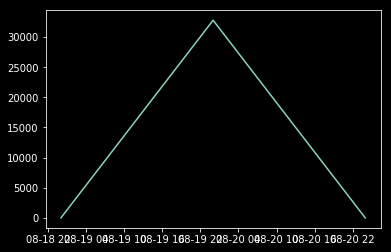

In [62]:
plot(dates, np.array(temps)*1e6)